In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = Path('./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)')
path

PosixPath('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)')

In [4]:
path.ls()

[PosixPath('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'),
 PosixPath('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'),
 PosixPath('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/models'),
 PosixPath('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/export.pkl')]

In [6]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=128).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (70295 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);

Valid: LabelList (17572 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);

Test: None

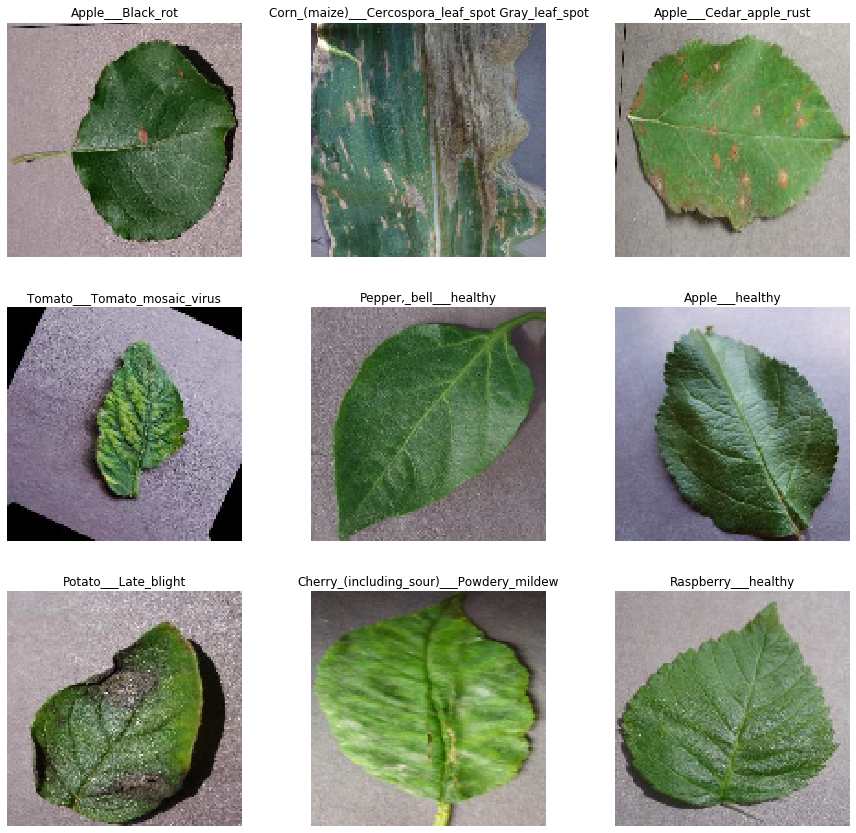

In [8]:
data.show_batch(3, figsize=(12,12))

In [9]:
data.classes, data.c

(['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Cherry_(including_sour)___healthy',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___healthy',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Grape___healthy',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___Late_blight',
  'Potato___healthy',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___Leaf_scorch',
  'Strawberry___healthy',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  '

## ResNet34
* Progressive resizing -- 128 x 128, 256 x 256

### Size - 128 x 128

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.424815,0.227553,0.925336,0.074664,04:52
1,0.204021,0.101948,0.964432,0.035568,04:54
2,0.128378,0.058548,0.980765,0.019235,04:53
3,0.112167,0.047445,0.983895,0.016105,04:52


In [16]:
learn.save('Res34stage-1')

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


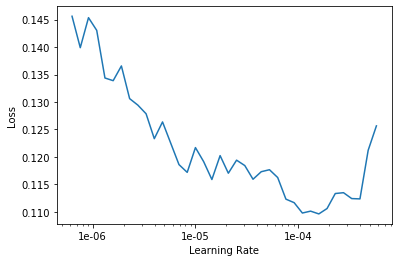

In [17]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.096968,0.042686,0.986342,0.013658,07:14
1,0.030223,0.016232,0.994764,0.005236,07:18


In [19]:
learn.save('Res34-stage-2')

### Size - 256 x 256

In [13]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=256).normalize(imagenet_stats)
data, data.classes, data.c

(ImageDataBunch;
 
 Train: LabelList (70295 items)
 x: ImageList
 Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
 y: CategoryList
 Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
 Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);
 
 Valid: LabelList (17572 items)
 x: ImageList
 Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
 y: CategoryList
 Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
 Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);
 
 Test: None,
 ['App

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
learn.load('Res34-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (70295 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);

Valid: LabelList (17572 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);

Test: None, model=Sequ

In [23]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.046659,0.030954,0.991236,0.008764,22:48
1,0.020196,0.016001,0.994821,0.005179,28:44


epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


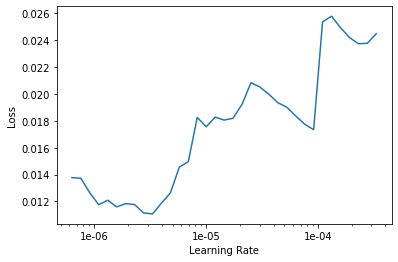

In [25]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(7e-7,3e-6))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.018099,0.015699,0.995277,0.004723,38:17
1,0.021504,0.014325,0.995789,0.004211,38:11


In [28]:
learn.save('Res34-final')

In [29]:
learn.export()

## Validation Set Inference

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
learn.load('Res34-final')

Learner(data=ImageDataBunch;

Train: LabelList (70295 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);

Valid: LabelList (17572 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
Path: New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented);

Test: None, model=Sequ

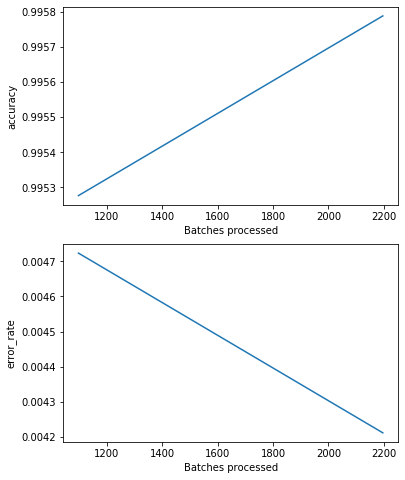

In [33]:
learn.recorder.plot_metrics()

In [15]:
interpret = ClassificationInterpretation.from_learner(learn)

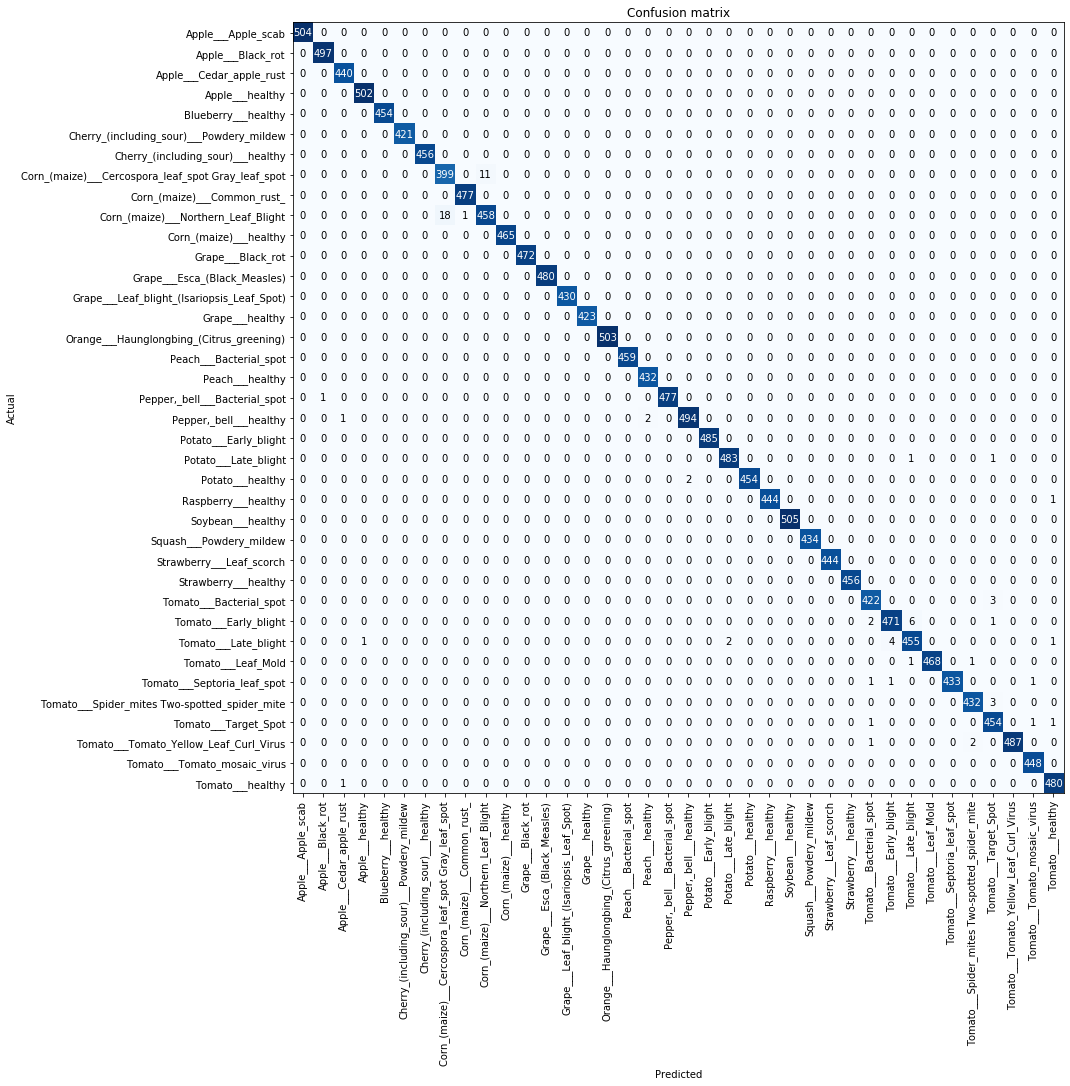

In [16]:
interpret.plot_confusion_matrix(figsize=(15,15))

In [17]:
interpret.most_confused()

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  18),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  11),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 6),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 4),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', 3),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 3),
 ('Pepper,_bell___healthy', 'Peach___healthy', 2),
 ('Potato___healthy', 'Pepper,_bell___healthy', 2),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 2),
 ('Tomato___Late_blight', 'Potato___Late_blight', 2),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  2),
 ('Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Common_rust_', 1),
 ('Pepper,_bell___Bacterial_spot', 'Apple___Black_rot', 1),
 ('Pepper,_bell___healthy', 'Apple___Cedar_apple_rust', 1),
 ('Potato___Late_blight', 'Tomato_

In [140]:
valid_preds, _ = learn.get_preds(ds_type=DatasetType.Valid)

In [142]:
valid_preds = valid_preds.numpy()
valid_preds

array([[5.499612e-14, 1.205347e-14, 7.145860e-15, 5.551354e-12, ..., 4.570395e-07, 7.468052e-09, 1.162595e-09,
        1.021151e-08],
       [5.719849e-12, 4.882792e-14, 2.951338e-11, 5.832925e-10, ..., 8.231252e-04, 2.378354e-10, 6.294877e-10,
        3.791928e-04],
       [3.328332e-14, 2.746210e-18, 3.509062e-14, 8.326873e-11, ..., 1.505133e-09, 2.521197e-08, 1.884176e-13,
        3.814469e-09],
       [9.975893e-16, 1.380342e-15, 2.244171e-14, 5.761898e-09, ..., 6.492771e-06, 1.108899e-08, 2.107190e-14,
        1.519370e-08],
       ...,
       [2.316169e-10, 1.095292e-10, 8.445288e-09, 2.310589e-12, ..., 1.457274e-08, 5.900057e-13, 1.073637e-12,
        2.764375e-08],
       [1.739914e-09, 1.618162e-11, 8.284678e-12, 2.127269e-11, ..., 2.408617e-11, 4.458017e-13, 1.437785e-14,
        3.879342e-10],
       [1.493594e-06, 9.276931e-06, 6.031198e-08, 2.398962e-05, ..., 1.285086e-06, 1.492615e-07, 3.021077e-09,
        6.192138e-08],
       [6.095375e-09, 1.746342e-08, 1.566681e-11, 

In [144]:
valid_preds = valid_preds.argmax(axis=1)

In [145]:
valid_true = learn.data.valid_ds.y

In [147]:
k = list(valid_true)
k = pd.Series(k)

In [148]:
learn.data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [149]:
temp = {}
j = 0
for i in learn.data.classes:
    temp[i] = j
    j += 1
temp

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [150]:
m = []
for i in k:
    m.append(temp[str(i)])
m = np.array(m)

In [151]:
valid_true = m
valid_true

array([33, 33, 33, 33, ..., 30, 30, 30, 30])

In [152]:
valid_preds, valid_true

(array([33, 33, 33, 33, ..., 30, 30, 30, 30]),
 array([33, 33, 33, 33, ..., 30, 30, 30, 30]))

In [121]:
def precision(cm):
    prec = []
    k = 0
    for i in cm:
        temp = i[k]/sum(cm[:, k])
        prec.append(temp)
        k += 1
    prec = np.array(prec)   
    return prec
        
def recall(cm):
    rec = []
    k = 0
    for i in cm:
        temp = i[k]/sum(i)
        rec.append(temp)
        k += 1
    rec = np.array(rec)    
    return rec

def f1_score(cm):
    prec = precision(cm)
    rec = recall(cm)
    f_score = (2*prec*rec)/(prec + rec)
    return f_score

In [225]:
prec = precision(cm)
rec = recall(cm)
f1 = f1_score(cm)

In [226]:
classAccMetrics = pd.DataFrame({'Class': learn.data.classes, 'Precision': prec, 'Recall': rec, 'F1_Score': f1})
classAccMetrics.set_index('Class')

,Precision,Recall,F1_Score
Class,,,
Apple___Apple_scab,1.000000,1.000000,1.000000
Apple___Black_rot,0.997992,1.000000,0.998995
Apple___Cedar_apple_rust,0.995475,1.000000,0.997732
Apple___healthy,0.998012,1.000000,0.999005
Blueberry___healthy,1.000000,1.000000,1.000000
Cherry_(including_sour)___Powdery_mildew,1.000000,1.000000,1.000000
Cherry_(including_sour)___healthy,1.000000,1.000000,1.000000
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,0.956835,0.973171,0.964933
Corn_(maize)___Common_rust_,0.997908,1.000000,0.998953


In [227]:
classAccMetrics.mean()

Precision    0.995675
Recall       0.995752
F1_Score     0.995707
dtype: float64

* Mean Precision = 99.568%
* Mean Recall = 99.575%
* Mean F1 score = 99.571%
* Overall Accuracy = 99.579%

## Test Set Inference

In [156]:
test_path = Path('./test')
test_path.ls()

[PosixPath('test/test'), PosixPath('test/test_label.csv')]

In [157]:
test = (ImageList.from_folder(test_path, presort=True))

In [158]:
test

ImageList (33 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: test

In [179]:
learn = load_learner(path, test=test)

In [180]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [181]:
preds = preds.argmax(dim=1)

In [182]:
learn.data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [183]:
pred_classes = [learn.data.classes[i] for i in preds]

In [184]:
testLabel = pd.read_csv('./test/test_label.csv')
testLabel.head()

,True_Class
0,Apple___Cedar_apple_rust
1,Apple___Cedar_apple_rust
2,Apple___Cedar_apple_rust
3,Apple___Cedar_apple_rust
4,Apple___Apple_scab


In [185]:
df = pd.DataFrame({'Pred_Class': pred_classes, 'Pred_model': preds})
df.head()

,Pred_Class,Pred_model
0,Apple___Cedar_apple_rust,2
1,Apple___Cedar_apple_rust,2
2,Apple___Cedar_apple_rust,2
3,Apple___Cedar_apple_rust,2
4,Apple___Apple_scab,0


In [186]:
testLabel = testLabel.join(df)
testLabel.head()

,True_Class,Pred_Class,Pred_model
0,Apple___Cedar_apple_rust,Apple___Cedar_apple_rust,2
1,Apple___Cedar_apple_rust,Apple___Cedar_apple_rust,2
2,Apple___Cedar_apple_rust,Apple___Cedar_apple_rust,2
3,Apple___Cedar_apple_rust,Apple___Cedar_apple_rust,2
4,Apple___Apple_scab,Apple___Apple_scab,0


In [187]:
acc_test = (testLabel['True_Class'] == testLabel['Pred_Class']).mean()
acc_test

0.9696969696969697

* Accuracy on test set = 96.97%